<font color="DD740A">
<h1>Curso de Machine Learning con Python</h1> 
<h3>Tema7: Machine Learning con Python</h3>
<h4>Clasificación (Ejercicio)</h4>
</font>    

*Autor: ITI*<br>
*Copyright 2020 Instituto Tecnológico de Informática (ITI). Prohibida la reproducción total o parcial sin permiso del ITI*

# Importar librerías

In [1]:
# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.model_selection import KFold

In [18]:
# Variables globales
BOLD = '\033[1m'
NO_BOLD = '\033[0m'

# Directorio del Datawarehouse 

In [2]:
# Visualizar el directorio actual
os.getcwd()

'C:\\Users\\aulafor\\Desktop\\b\\scripts'

In [ ]:
# Establecer el Source Directory, para apuntar donde se encuentran los datos

## Puede hacerse con ruta relativa
sDir = '../../../Data/' #Ej. Linux
sDir = '..\\..\\..\\Data/' #Ej. Windows

## Puede hacerse con ruta absoluta 
sDir = 'C:\\Usuarios\\aulafor\\Descargas\\' # Ej. Windows
sDir = "/home/mbravo/Descargas/" # Ej. Linux

In [3]:
cd ..

C:\Users\aulafor\Desktop\b


In [6]:
sDir = '..\\..\\..\\Data/'

In [8]:
cd Data

C:\Users\aulafor\Desktop\b\Data


In [7]:
# Identificar los ficheros del directorio indicado

! ls {sDir} # Linux
! dir {sDir} # Windows
# os.listdir(sDir)

"ls" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
El modificador no es v lido: "#".


# MODELADO DE ALGORITMOS DE ML

- Importamos el dataset 
- Exploramos los datos
- Importamos el modelo
- Realizamos el modelado con arrays de Numpy 

In [ ]:
df = df_xxx.copy()
target = 'variable objetivo'

### Seleccionamos las features (X) y el target (y)
X = df.drop(target, axis = 'columns')
y = df.loc[:,target]

### Dividir los datos en training/test (80-20) con shuffle automático
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) # Realiza un shuffle automático

### Creamos el objeto del modelo específico
model_name = model_library()

### Entrenamos el modelo con los datos conocidos
model_name.fit(X_train,y_train)

### Predecimos con los datos a futuro (datos nunca vistos)
y_pred = model_name.predict(X_test)

### Visualizamos los resultados del modelo
print_model_report('model name', model_name)

### Almacenamos la métrica del modelo
auc_model = aucscore(model_name)

# (II) MODELOS DE CLASIFICACIÓN

## Funciones customizadas para las métricas de clasificación

In [16]:
def acc_score(model):
    k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
    return np.mean(cross_val_score(model,X_train,y_train,cv=k_fold,scoring="accuracy"))

def confusion_matrix_model(model_used):
    cm=confusion_matrix(y_test,model_used.predict(X_test))
    col=["Predicted Dead","Predicted Survived"]
    cm=pd.DataFrame(cm)
    cm.columns=["Predicted Dead","Predicted Survived"]
    cm.index=["Actual Dead","Actual Survived"]
    #cm[col]=np.around(cm[col].div(cm[col].sum(axis=1),axis=0),decimals=2)
    return cm

def aucscore(model,has_proba=True):
    roc_auc = roc_auc_score(y_test, model.predict(X_test))
    return roc_auc

def plt_roc_curve(name,model,has_proba=True):
    roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label= name + ' (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

def importance_of_features(model):
    features = pd.DataFrame()
    features['feature'] = X_train.columns
    features['importance'] = model.feature_importances_
    features.sort_values(by=['importance'], ascending=True, inplace=True)
    features.set_index('feature', inplace=True)
    return features.plot(kind='barh', figsize=(10,10)),


def print_model_report(name,model):
    
    print(BOLD + '\n Informe de Resultados del modelo: ' + name +' \n'+ NO_BOLD)
    
    print(BOLD + '\n Precisión del modelo:\n' + NO_BOLD)
    print('Accuracy de '+name+' en train: ' + str(acc_score(model)))
    print('Accuracy de '+name+' en test: {:.2f}'.format(model.score(X_test, y_test)))

    #from sklearn.metrics import confusion_matrix
    print(BOLD + '\n Matriz de confusión:\n' + NO_BOLD)
    print(confusion_matrix_model(model))

    
    from sklearn.metrics import classification_report
    print(BOLD + '\n Resultados: \n' + NO_BOLD)
    print(classification_report(y_test, y_pred))

    ## Plot ROC Curve
    print(BOLD + '\n Curva ROC: \n' + NO_BOLD)
    plt_roc_curve(name ,model)

def compare_real_pred(dataframe, target, X_test, y_pred):
    # Comparativa de las predicciones frente a la realidad
    df_comparative = dataframe.loc[X_test.index]
    df_comparative['Predicción'] = y_pred
    df_comparative['Modelo Acierta'] = df_comparative[target] == df_comparative['Predicción']
    return df_comparative

## Importar el dataset TITANIC

<i><b>Dataset: TITANIC</b>
    
Diccionario de datos:
<ul>
    <li>Survival: 0 = No, 1 = Yes</li> 
    <li>pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd 
    <li>sex: Sex. (male/female)
    <li>Age: Age in years 
    <li>sibsp: # of siblings / spouses aboard the Titanic 
    <li>parch: # of parents / children aboard the Titanic 
    <li>ticket: Ticket number 
    <li>fare: Passenger fare 
    <li>cabin: Cabin number 
    <li>embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
</ul>
</i>

In [9]:
# Importar el dataset titanic
df_titanic = pd.read_csv("titanic_data.csv")

In [11]:
# EDA. Ya realizado en la sesión de Análisis Exploratorio de Datos
df_titanic.head()

,Name,Pclass,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,"Artagaveytia, Mr. Ramon",1,male,71.0,0,0,PC 17609,49.5042,NaN,C,0
1,"Astor, Col. John Jacob",1,male,47.0,1,0,PC 17757,227.5250,C62 C64,C,0
2,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",1,female,18.0,1,0,PC 17757,227.5250,C62 C64,C,1
3,"Aubart, Mme. Leontine Pauline",1,female,24.0,0,0,PC 17477,69.3000,B35,C,1
4,"Baxter, Mr. Quigg Edmond",1,male,24.0,0,1,PC 17558,247.5208,B58 B60,C,0


#### Preprocesado del dataset Titanic

In [12]:
# Eliminar las variables innecesarias para el análisis: 'Name','Ticket','Cabin'
df_titanic_pre = df_titanic.drop(['Name','Ticket', 'Cabin'], axis=1)

# Embarked -- Imputación con la moda (En este caso, valor categórico más frecuente)
df_titanic_pre["Embarked"] = df_titanic_pre["Embarked"].fillna("S")

# Age  --  Imputación con la media
df_titanic_pre['Age'] = df_titanic_pre.groupby(['Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))
df_titanic_pre.groupby(['Pclass'])['Age'].mean()

# Fare  --  Imputación con la mediana (Valor del percentil 50. Promedio de los valores centrales cuando estos se encuentran ordenados de mayor a menor)
df_titanic_pre["Fare"].fillna(df_titanic_pre["Fare"].median(), inplace=True)

# Codificar las variables categóricas del dataset
df_titanic_pre.Sex.replace(('male','female'), (0,1), inplace = True)
df_titanic_pre.Embarked.replace(('S','C','Q'), (0,1,2), inplace = True)


display(df_titanic_pre.head())

df_titanic_pre.info()

,Pclass,Sex,Age,Sibsp,Parch,Fare,Embarked,Survived
0,1,0,71.0,0,0,49.5042,1,0
1,1,0,47.0,1,0,227.5250,1,0
2,1,1,18.0,1,0,227.5250,1,1
3,1,1,24.0,0,0,69.3000,1,1
4,1,0,24.0,0,1,247.5208,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   int64  
 2   Age       1309 non-null   float64
 3   Sibsp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1309 non-null   float64
 6   Embarked  1309 non-null   int64  
 7   Survived  1309 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 81.9 KB


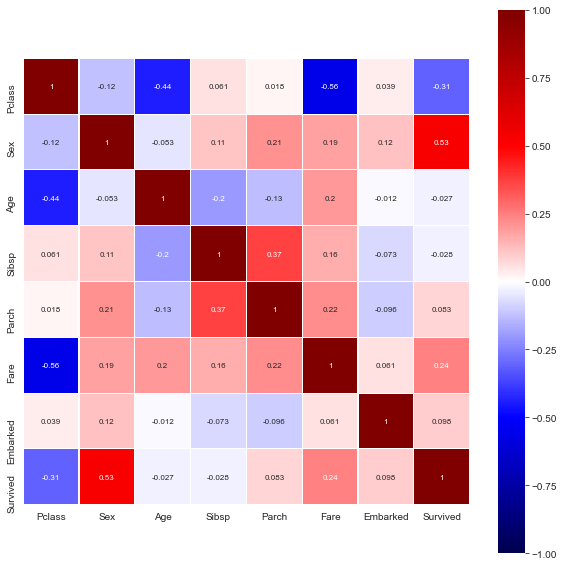

In [13]:
# Matriz de correlaciones lineales de Pearson

corr = df_titanic_pre.corr()
fig = plt.figure(figsize=(10,10))
sns.heatmap(corr,
                cmap='seismic', vmax=1.0, vmin=-1.0, linewidths=0.1,
                annot=True, annot_kws={"size":8}, square=True);

## REGRESIÓN LOGÍSTICA

In [14]:
#### Importar la librería 

from sklearn.linear_model import LogisticRegression

In [ ]:
########################### Regresión logística ###########################

reglog = 



 Informe de Resultados del modelo: Logistic Regression 


 Precisión del modelo:

Accuracy de Logistic Regression en train: 0.7956163135110503
Accuracy de Logistic Regression en test: 0.77

 Matriz de confusión:

                 Predicted Dead  Predicted Survived
Actual Dead                 145                  23
Actual Survived              37                  57

 Resultados: 

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       168
           1       0.71      0.61      0.66        94

    accuracy                           0.77       262
   macro avg       0.75      0.73      0.74       262
weighted avg       0.77      0.77      0.77       262


 Curva ROC: 



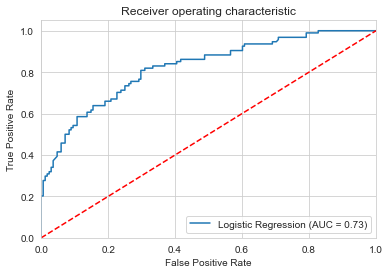

In [35]:
df = df_titanic_pre.copy()
target = 'Survived'

### Seleccionamos las features (X) y el target (y)
X = df.drop(target, axis = 'columns')
y = df.loc[:,target]

### Dividir los datos en training/test (80-20) con shuffle automático
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) # Realiza un shuffle automático

### Creamos el objeto del modelo específico
reglog = LogisticRegression()

### Entrenamos el modelo con los datos conocidos
reglog.fit(X_train,y_train)

### Predecimos con los datos a futuro (datos nunca vistos)
y_pred = reglog.predict(X_test)

### Visualizamos los resultados del modelo
print_model_report('Logistic Regression', reglog)

### Almacenamos la métrica del modelo
auc_reglog = aucscore(reglog)

In [27]:
# Tabla comparativa de las predicciones frente a la realidad
# Function: compare_real_pred(dataframe, target, X_test, y_pred)

compare_real_pred(df_titanic, target, X_test, y_pred)['Modelo Acierta'].sum()

202

## VECINOS PRÓXIMOS (KNN)

In [28]:
#### Importar la librería 

from sklearn.neighbors import KNeighborsClassifier


 Informe de Resultados del modelo: K Neighbors 


 Precisión del modelo:

Accuracy de K Neighbors en train: 0.6733652312599681
Accuracy de K Neighbors en test: 0.71

 Matriz de confusión:

                 Predicted Dead  Predicted Survived
Actual Dead                 136                  32
Actual Survived              43                  51

 Resultados: 

              precision    recall  f1-score   support

           0       0.76      0.81      0.78       168
           1       0.61      0.54      0.58        94

    accuracy                           0.71       262
   macro avg       0.69      0.68      0.68       262
weighted avg       0.71      0.71      0.71       262


 Curva ROC: 



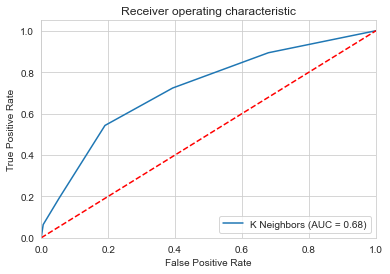

In [36]:
########################### KNN - Vecinos Próximos ###########################

df = df_titanic_pre.copy()
target = 'Survived'

### Seleccionamos las features (X) y el target (y)
X = df.drop(target, axis = 'columns')
y = df.loc[:,target]

### Dividir los datos en training/test (80-20) con shuffle automático
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) # Realiza un shuffle automático

### Creamos el objeto del modelo específico
knn = KNeighborsClassifier(n_neighbors=5)

### Entrenamos el modelo con los datos conocidos
knn.fit(X_train,y_train)

### Predecimos con los datos a futuro (datos nunca vistos)
y_pred = knn.predict(X_test)

### Visualizamos los resultados del modelo
print_model_report('K Neighbors', knn)

### Almacenamos la métrica del modelo
auc_knn = aucscore(knn)

### Ajustando los hiperparámetros del modelo

In [29]:
# Selección de mejores hiperparámetros de forma manual

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
name = "knn(1)"
print('AUC de '+name+': {:.2f}'.format(aucscore(knn)))

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
name = "knn(3)"
print('AUC de '+name+': {:.2f}'.format(aucscore(knn)))

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
name = "knn(5)"
print('AUC de '+name+': {:.2f}'.format(aucscore(knn)))

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
name = "knn(7)"
print('AUC de '+name+': {:.2f}'.format(aucscore(knn)))

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
name = "knn(9)"
print('AUC de '+name+': {:.2f}'.format(aucscore(knn)))

knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
name = "knn(5), distance "
print('AUC de '+name+': {:.2f}'.format(aucscore(knn)))

knn = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
name = "knn(5), ball_tree "
print('AUC de '+name+': {:.2f}'.format(aucscore(knn)))

knn = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
name = "knn(5), kd_tree "
print('AUC de '+name+': {:.2f}'.format(aucscore(knn)))

knn = KNeighborsClassifier(n_neighbors=5, algorithm='brute')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
name = "knn(5), brute "
print('AUC de '+name+': {:.2f}'.format(aucscore(knn)))


print(BOLD +'\nEl modelo con mayor precisión es: Knn(5) con algoritmo de computación de vecinos ball tree' +NO_BOLD)



AUC de knn(1): 0.65
AUC de knn(3): 0.66
AUC de knn(5): 0.68
AUC de knn(7): 0.67
AUC de knn(9): 0.65
AUC de knn(5), distance : 0.67
AUC de knn(5), ball_tree : 0.68
AUC de knn(5), kd_tree : 0.68
AUC de knn(5), brute : 0.68

El modelo con mayor precisión es: Knn(5) con algoritmo de computación de vecinos ball tree



 Informe de Resultados del modelo: KNN 


 Precisión del modelo:

Accuracy de KNN en train: 0.671451355661882
Accuracy de KNN en test: 0.73

 Matriz de confusión:

                 Predicted Dead  Predicted Survived
Actual Dead                 139                  29
Actual Survived              43                  51

 Resultados: 

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       168
           1       0.64      0.52      0.57        94

    accuracy                           0.72       262
   macro avg       0.70      0.68      0.68       262
weighted avg       0.71      0.72      0.71       262


 Curva ROC: 



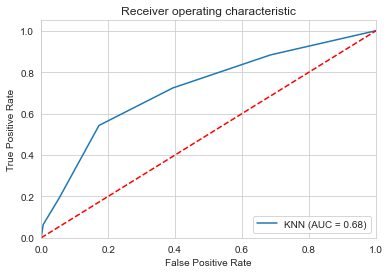

In [30]:
# Almacenamos la métrica del modelo Knn más óptimo

knn = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
knn.fit(X_train,y_train)
print_model_report('KNN', knn)

auc_knn = aucscore(knn)

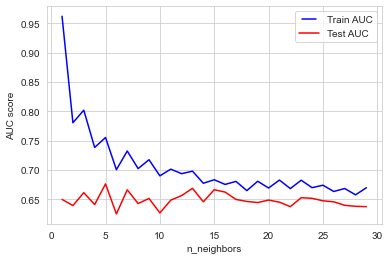

In [31]:
# Búsqueda del k más óptimo de manera automática

neighbors = list(range(1,30))
train_results = []
test_results = []
for n in neighbors:
   model = KNeighborsClassifier(n_neighbors=n)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(neighbors, train_results, 'b', label='Train AUC')
line2, = plt.plot(neighbors, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_neighbors')
plt.show()

## NAIVE BAYES

In [34]:
#### Importar la librería 
from sklearn.naive_bayes import GaussianNB


 Informe de Resultados del modelo: Naive Bayes 


 Precisión del modelo:

Accuracy de Naive Bayes en train: 0.7803372066529961
Accuracy de Naive Bayes en test: 0.76

 Matriz de confusión:

                 Predicted Dead  Predicted Survived
Actual Dead                 141                  27
Actual Survived              35                  59

 Resultados: 

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       168
           1       0.69      0.63      0.66        94

    accuracy                           0.76       262
   macro avg       0.74      0.73      0.74       262
weighted avg       0.76      0.76      0.76       262


 Curva ROC: 



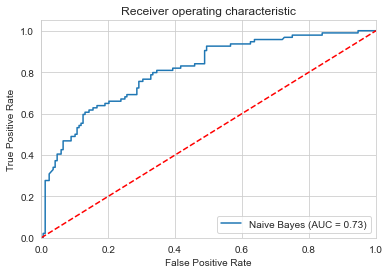

In [37]:
########################### Naive Bayes ###########################
df = df_titanic_pre.copy()
target = 'Survived'

### Seleccionamos las features (X) y el target (y)
X = df.drop(target, axis = 'columns')
y = df.loc[:,target]

### Dividir los datos en training/test (80-20) con shuffle automático
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) # Realiza un shuffle automático

### Creamos el objeto del modelo específico
nb = GaussianNB()

### Entrenamos el modelo con los datos conocidos
nb.fit(X_train,y_train)

### Predecimos con los datos a futuro (datos nunca vistos)
y_pred = nb.predict(X_test)

### Visualizamos los resultados del modelo
print_model_report('Naive Bayes', nb)

### Almacenamos la métrica del modelo
auc_nb = aucscore(nb)


## ÁRBOLES DE DECISIÓN

In [38]:
#### Importar la librería 
from sklearn.tree import DecisionTreeClassifier


 Informe de Resultados del modelo: Naive Bayes 


 Precisión del modelo:

Accuracy de Naive Bayes en train: 0.7593483709273183
Accuracy de Naive Bayes en test: 0.74

 Matriz de confusión:

                 Predicted Dead  Predicted Survived
Actual Dead                 140                  28
Actual Survived              41                  53

 Resultados: 

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       168
           1       0.65      0.56      0.61        94

    accuracy                           0.74       262
   macro avg       0.71      0.70      0.70       262
weighted avg       0.73      0.74      0.73       262


 Curva ROC: 



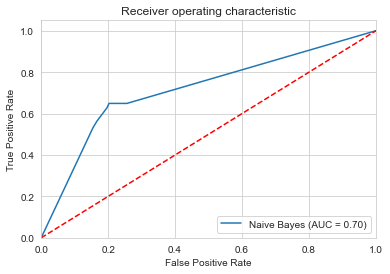

In [39]:
########################### ÁRBOLES DE DECISIÓN - CLASIFICACIÓN ###########################

df = df_titanic_pre.copy()
target = 'Survived'

### Seleccionamos las features (X) y el target (y)
X = df.drop(target, axis = 'columns')
y = df.loc[:,target]

### Dividir los datos en training/test (80-20) con shuffle automático
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) # Realiza un shuffle automático

### Creamos el objeto del modelo específico
Dec_tree = DecisionTreeClassifier()

### Entrenamos el modelo con los datos conocidos
Dec_tree.fit(X_train,y_train)

### Predecimos con los datos a futuro (datos nunca vistos)
y_pred = Dec_tree.predict(X_test)

### Visualizamos los resultados del modelo
print_model_report('Decision Tree', Dec_tree)

### Almacenamos la métrica del modelo
auc_tree = aucscore(Dec_tree)
 

(<matplotlib.axes._subplots.AxesSubplot at 0x174a17939a0>,)

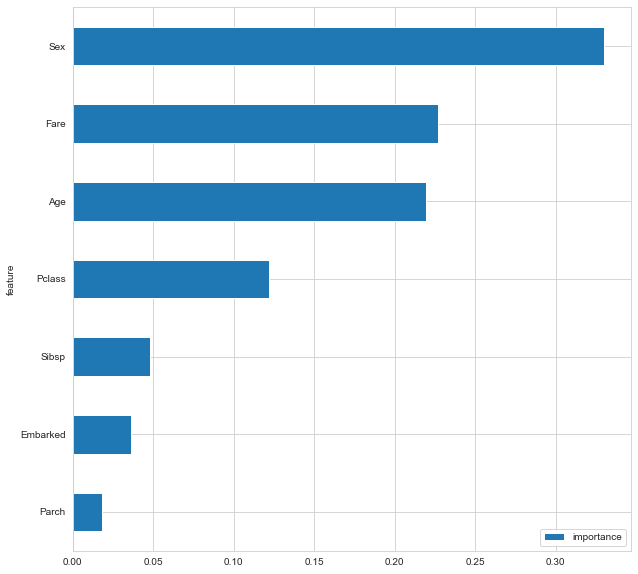

In [40]:
# Visualizar la importancia de cada variable
importance_of_features(Dec_tree)

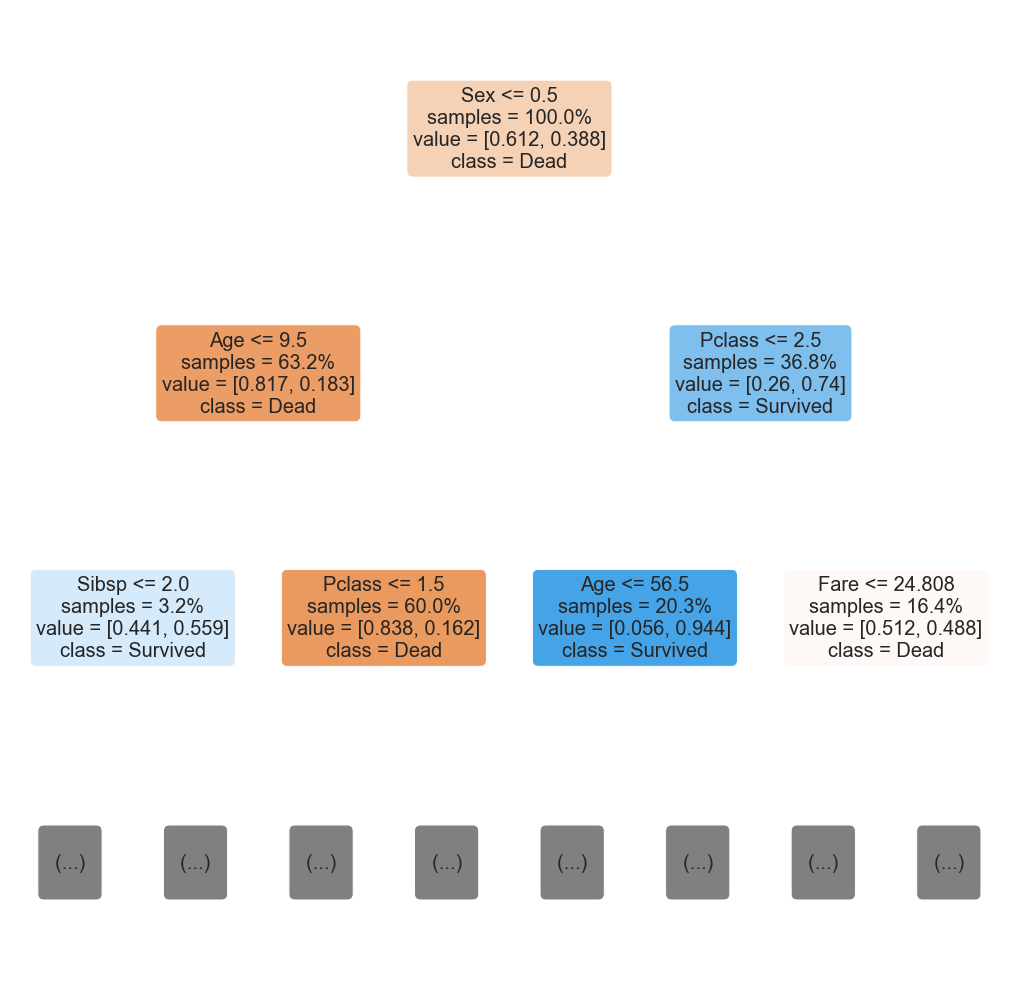

In [41]:
# Visualizar el árbol

from sklearn import tree

plt.figure(figsize=(18,18))
tree.plot_tree(Dec_tree, feature_names = X_train.columns, class_names=(['Dead','Survived']) ,filled=True, max_depth= 2,impurity=False, fontsize=20, rounded=True, proportion=True)
#tree.plot_tree(Dec_tree, feature_names = X_train.columns, class_names=True,filled=True, max_depth= 2,impurity=False, fontsize=20)

plt.show()

### Ajustando/Tuneando el árbol de decisión

In [ ]:
# Selección de los mejores hiperparámetros
## Modelo por defecto:

#DecisionTreeClassifier(class_weight=None, 
#                         criterion=’gini’, max_depth=None,
#                         max_features=None, 
#                         max_leaf_nodes=None,
#                         min_impurity_split=1e-07, 
#                         min_samples_leaf=1,
#                         min_samples_split=2, 
#                         min_weight_fraction_leaf=0.0,
#                         presort=False, 
#                         random_state=None, 
#                         splitter=’best’
#                         )

In [42]:
# Criterion: gini, entropy

tree = DecisionTreeClassifier(criterion='gini',random_state=42)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
name = "tree(gini): "
print('AUC de '+name + str(aucscore(tree)))

tree = DecisionTreeClassifier(criterion='entropy',random_state=42)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
name = "tree(entropy): "
print('AUC de '+name + str(aucscore(tree)))


AUC de tree(gini): 0.7062436676798379
AUC de tree(entropy): 0.6909194528875379


In [43]:
# Splitter: best, random

tree = DecisionTreeClassifier(splitter='best')
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
name = "tree(best): "
print('AUC de '+name + str(aucscore(tree)))

tree = DecisionTreeClassifier(splitter='random')
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
name = "tree(random): "
print('AUC de '+name + str(aucscore(tree)))

AUC de tree(best): 0.72346757852077
AUC de tree(random): 0.6711626139817629


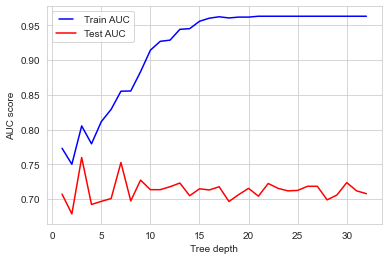

In [44]:
# max_depth

# The first parameter to tune is max_depth. 
# This indicates how deep the tree can be. 
# The deeper the tree, the more splits it has and it captures more information about the data. 
# We fit a decision tree with depths ranging from 1 to 32 and plot the training and test auc scores.

max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

# We see that our model overfits for large depth values. 
# The tree perfectly predicts all of the train data, however, it fails to generalize the findings for new data

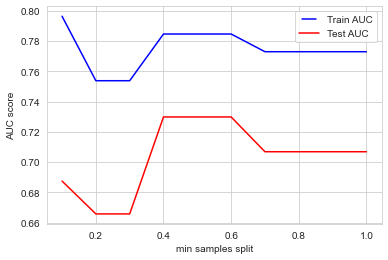

In [46]:
# min_samples_split

# min_samples_split represents the minimum number of samples required to split an internal node. 
# This can vary between considering at least one sample at each node to considering all of the samples at each node. 
# When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node. Here we will vary the parameter from 10% to 100% of the samples

min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

# We can clearly see that when we consider 100% of the samples at each node, the model cannot learn enough about the data. 
# This is an underfitting case.

In [45]:
# Almacenamos la métrica obtenida con el árbol más óptimo: max_depth=3, min_samples_split = 0.4, splitter='random'

# Entrenamos el árbol óptimo 
Dec_tree = DecisionTreeClassifier(max_depth=3, min_samples_split = 0.4, splitter='random')
Dec_tree.fit(X_train,y_train)
y_pred = Dec_tree.predict(X_test)

name = "tree(max_depth=3, min_samples_split = 0.4, splitter='random): "
print('AUC de '+name + str(aucscore(tree)))

# Almacenamos la métrica btenida con el árbol óptimo
auc_Dec_tree = aucscore(Dec_tree)

AUC de tree(max_depth=3, min_samples_split = 0.4, splitter='random): 0.6711626139817629


# (III) MODELOS BLACK BOX

## REDES NEURONALES ARTIFICIALES

In [47]:
#### Importar la librería 
from sklearn.neural_network import MLPClassifier


 Informe de Resultados del modelo: Neural Network 


 Precisión del modelo:

Accuracy de Neural Network en train: 0.795643654591023
Accuracy de Neural Network en test: 0.78

 Matriz de confusión:

                 Predicted Dead  Predicted Survived
Actual Dead                 146                  22
Actual Survived              36                  58

 Resultados: 

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       168
           1       0.72      0.62      0.67        94

    accuracy                           0.78       262
   macro avg       0.76      0.74      0.75       262
weighted avg       0.77      0.78      0.77       262


 Curva ROC: 



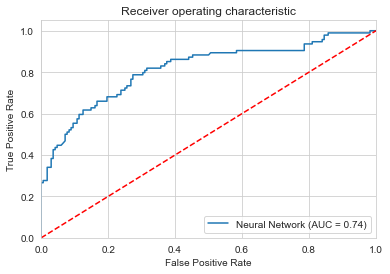

In [51]:
########################### Redes Neuronales Artificiales - Multilayer Perceptron (MLP) ###########################

df = df_titanic_pre.copy()
target = 'Survived'

### Seleccionamos las features (X) y el target (y)
X = df.drop(target, axis = 'columns')
y = df.loc[:,target]

### Dividir los datos en training/test (80-20) con shuffle automático
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) # Realiza un shuffle automático

### Creamos el objeto del modelo específico
nn = MLPClassifier()

### Entrenamos el modelo con los datos conocidos
nn.fit(X_train,y_train)

### Predecimos con los datos a futuro (datos nunca vistos)
y_pred = nn.predict(X_test)

### Visualizamos los resultados del modelo
print_model_report('Neural Network', nn)

### Almacenamos la métrica del modelo
auc_nn = aucscore(nn)


### Ajustando/Tuneando  la red neuronal

In [52]:
# Selección de los mejores hiperparámetros
## Modelo por defecto:

# MLPClassifier(hidden_layer_sizes=(100, ), 
#               activation=’relu’, 
#               solver=’adam’, 
#               alpha=0.0001, 
#               batch_size=’auto’, 
#               learning_rate=’constant’, 
#               learning_rate_init=0.001, 
#               power_t=0.5, 
#               max_iter=200, 
#               shuffle=True, 
#               random_state=None, 
#               tol=0.0001, 
#               verbose=False, 
#               warm_start=False, 
#               momentum=0.9, 
#               nesterovs_momentum=True, 
#               early_stopping=False, 
#               validation_fraction=0.1, 
#               beta_1=0.9, 
#               beta_2=0.999, 
#               epsilon=1e-08, 
#               n_iter_no_change=10
#              )



nn = MLPClassifier(activation='identity',random_state=42)
nn.fit(X_train,y_train)
y_pred = nn.predict(X_test)
name = "nn(identity): "
print('AUC de '+name + str(aucscore(nn)))

nn = MLPClassifier(activation='logistic',random_state=42)
nn.fit(X_train,y_train)
y_pred = nn.predict(X_test)
name = "nn(logistic): "

print('AUC de '+name + str(aucscore(nn)))
nn = MLPClassifier(activation='tanh',random_state=42)
nn.fit(X_train,y_train)
y_pred = nn.predict(X_test)
name = "nn(tanh): "

print('AUC de '+name + str(aucscore(nn)))
nn = MLPClassifier(activation='relu',random_state=42)
nn.fit(X_train,y_train)
y_pred = nn.predict(X_test)
name = "nn(relu): "
print('AUC de '+name + str(aucscore(nn)))

AUC de nn(identity): 0.7128292806484295
AUC de nn(logistic): 0.7460106382978724
AUC de nn(tanh): 0.7500633232016212
AUC de nn(relu): 0.7287867274569402


In [53]:
# Almacenamos la métrica obtenida con la MLP más óptima: activation='tanh'

nn = MLPClassifier(activation='tanh' ,random_state=42)
nn.fit(X_train,y_train)
y_pred = nn.predict(X_test)

name = "nn(tanh): "
print('AUC de '+name + str(aucscore(nn)))
auc_nn = aucscore(nn)

AUC de nn(tanh): 0.7500633232016212


## Support Vector Machines (SVM)

In [69]:
#### Importar la librería 
from sklearn.svm import SVC


 Informe de Resultados del modelo: Support Vector Machines 


 Precisión del modelo:

Accuracy de Support Vector Machines en train: 0.663777625882889
Accuracy de Support Vector Machines en test: 0.70

 Matriz de confusión:

                 Predicted Dead  Predicted Survived
Actual Dead                 156                  12
Actual Survived              67                  27

 Resultados: 

              precision    recall  f1-score   support

           0       0.70      0.93      0.80       168
           1       0.69      0.29      0.41        94

    accuracy                           0.70       262
   macro avg       0.70      0.61      0.60       262
weighted avg       0.70      0.70      0.66       262


 Curva ROC: 



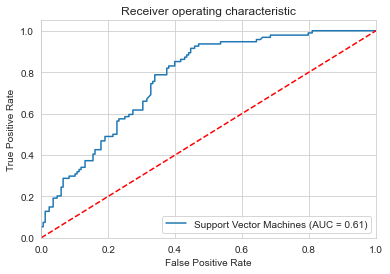

In [71]:
########################### Redes Neuronales Artificiales - Multilayer Perceptron (MLP) ###########################
df = df_titanic_pre.copy()
target = 'Survived'

### Seleccionamos las features (X) y el target (y)
X = df.drop(target, axis = 'columns')
y = df.loc[:,target]

### Dividir los datos en training/test (80-20) con shuffle automático
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) # Realiza un shuffle automático

### Creamos el objeto del modelo específico
svm = SVC(probability=True,random_state=42)

### Entrenamos el modelo con los datos conocidos
svm.fit(X_train,y_train)

### Predecimos con los datos a futuro (datos nunca vistos)
y_pred = svm.predict(X_test)

### Visualizamos los resultados del modelo
print_model_report('Support Vector Machines', svm)

### Almacenamos la métrica del modelo
auc_svm = aucscore(svm)


### Ajustando/Tuneando  SVM

#### Entrenar SVMs es muuuuuy cosotoso !!! Por ello la siguiente celda está comentada

In [ ]:
# Selección de los mejores hiperparámetros
## Modelo por defecto:

# SVC(C=1.0, 
#     kernel=’rbf’, 
#     degree=3, 
#     gamma=’auto_deprecated’, 
#     coef0=0.0, 
#     shrinking=True, 
#     probability=False, 
#     tol=0.001, 
#     cache_size=200, 
#     class_weight=None, 
#     verbose=False, 
#     max_iter=-1, d
#     ecision_function_shape=’ovr’, 
#     random_state=None
#    )


####### Requiere mucho tiempo de entrenamiento

# svm = SVC(probability=True, kernel = 'linear' )
# svm.fit(X_train,y_train)
# y_pred = svm.predict(X_test)
# name = "nn(identity): "
# print('AUC de '+name + str(aucscore(svm)))

# svm = SVC(probability=True, kernel = 'rbf' )
# svm.fit(X_train,y_train)
# y_pred = svm.predict(X_test)
# name = "nn(identity): "
# print('AUC de '+name + str(aucscore(svm)))

# svm = SVC(probability=True, kernel = 'poly' )
# svm.fit(X_train,y_train)
# y_pred = svm.predict(X_test)
# name = "nn(identity): "
# print('AUC de '+name + str(aucscore(svm)))

# (IV) COLECTIVIDADES (ENSEMBLES)

# RANDOM FOREST

In [ ]:
#### Importar la librería 

In [ ]:
########################### Random Forest ###########################

rf =

# (5) MEJORAR LOS RESULTADOS

## Ingeniería de features: One hot encoding, new variables...

## Ajuste de hiperparámetros automático: GridSearchCV

In [67]:
# 1) Elejir el modelo de clasificación

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=100)

# 2) Definir el espacio de búsqueda de hiperparámetros (Todos los valores que se quieren probar)

parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

#3) Ejecutar la búsqueda de hiperparámetros:
# Nota: El parámetro n_jobs define cuántos núcleos de CPU de la máquina se van a utilizar
# Nota: el parámetro cv define el número de splits para la validación cruzada

from sklearn.model_selection import GridSearchCV



################### Rellenar el comando GidsearchCV 

clf = GridSearchCV(mlp,parameter_space,n_jobs=-1,cv=3)

clf.fit(X_train, y_train)

# 4) Visualizar el mejor resultado obtenido

# Mejor set de hiperparámetros
print(BOLD +'Mejor combinación de hiperparámetros:\n'+ NO_BOLD, clf.best_params_)


# Visualizar todos los resultados
print(BOLD + '\n Todos los resultados calculados: \n'+ NO_BOLD)
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    
# 5) Realizar predicciones con el mejor set de hiperparámetros

#clf_best = clf.best_estimator_
#y_pred = clf_best.predict(X_test)

# Visualizamos los resultados del modelo
#print_model_report('Neural Network', clf)

Mejor combinación de hiperparámetros:
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}

 Todos los resultados calculados: 

0.672 (+/-0.056) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.785 (+/-0.035) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.700 (+/-0.031) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.793 (+/-0.027) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.681 (+/-0.066) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.797 (+/-0.045) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (5


 Informe de Resultados del modelo: Best Neural Network 


 Precisión del modelo:

Accuracy de Best Neural Network en train: 0.8051948051948052
Accuracy de Best Neural Network en test: 0.78

 Matriz de confusión:

                 Predicted Dead  Predicted Survived
Actual Dead                 153                  15
Actual Survived              42                  52

 Resultados: 

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       168
           1       0.78      0.55      0.65        94

    accuracy                           0.78       262
   macro avg       0.78      0.73      0.74       262
weighted avg       0.78      0.78      0.77       262


 Curva ROC: 



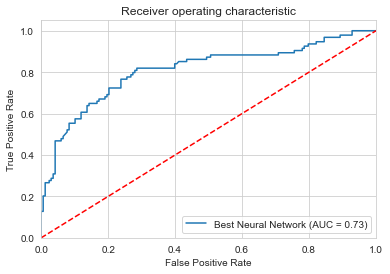

In [68]:
clf_best = clf.best_estimator_
y_pred = clf_best.predict(X_test)

# Visualizamos los resultados del modelo
print_model_report('Best Neural Network', clf_best)

# (6) PRESENTAR LOS RESULTADOS

In [ ]:
model_names = ['Reg. Logística','Knn','Naive Bayes','Árbol Decisión', 'Red Neuronal', 'SVM', 'Random Forest']
auc_metrics = [auc_reglog, auc_knn, auc_nb, auc_Dec_tree, auc_nn, auc_svm, auc_rf]
df_clf_metrics = pd.DataFrame({'Model name':model_names,
                               'AUC':auc_metrics     
                                })
df_clf_metrics

In [ ]:
# Mostrar las métricas obtenidas por cada modelo

df_clf_metrics = df_clf_metrics.sort_values(by='AUC', ascending = False)
sns.barplot( df_clf_metrics.AUC,df_clf_metrics['Model name'], orient = 'h', color='orange')